## Using Decision Tree with Spotify Dataset

A Decision Tree is an algorithm used for supervised learning problems such as classification or regression. A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. Each leaf of the tree is labeled with a class or a probability distribution over the classes.

A tree can be "learned" by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called **recursive partitioning**. The recursion is completed when the subset at a node has all the same value of the target variable or when splitting no longer adds values to the predictions. This process of top-down induction of decision trees is an example of a greedy algorithm, and it is the most commmon strategy for learning decision trees.

In this notebook I will be building a Decision Tree Classifier to determine whether or not the user might like a song based on its attributes using a Spotify dataset from [Kaggle](https://www.kaggle.com/geomack/spotifyclassification?select=data.csv). 



In [1]:
# The usual packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# To make our sets
from sklearn.model_selection import train_test_split
# The classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler 


### Step 1: EDA

In [2]:
# Load the data
df = pd.read_csv('data/spotify_attributes.csv')

df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
# Take a look at the shape of dataset
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 2017 rows and 16 columns in the dataset.


In [4]:
# Lets drop some columns

df.drop(columns=['song_title', 'artist'], inplace= True)


**Variables:**   


|    <strong>Variables</strong>        |  Description                                        |
|-------------------|-----------------------------------------------------|
|<strong>Acousticness</strong>  | This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.|   
|<strong>Danceability</strong>         | Danceability describes how suitablea track is for dancing based on a combination of musical elements (tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least dancable nd 1.0 is most dancable.|   
|<strong>Durationms</strong>         | Duration of a song in seconds.|
|<strong>Energy</strong>   | Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.|
|<strong>Instrumentalness</strong>       | This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.|
|<strong>Key</strong>    | A system of functionally related chords deriving from the major and minor scales, with a central note, called the tonic (or keynote).                             |
|<strong>Liveness</strong>       | This value describes the probability that the song was recorded with a live audience. According to the official documentation "a value above 0.8 provides strong likelihood that track is live". |
|<strong>Loudness</strong>    |The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db.|
|<strong>Mode</strong>|Mode indicates the modality(major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|<strong>Speechiness</strong>|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Value above 0.66 describe tracks that are probably made entirely of spoken words. Values betweeen 0.33 and 0.66 describe tracks that may contain both music and speech, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.      |
|<strong>Tempo</strong>    |The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|<strong>Time_signature</strong>|An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).|
|<strong>Valence</strong>|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|


**Target:**  

|    <strong>Target</strong>        |  Description                                        |
|-------------------|-----------------------------------------------------|
|<strong>Target</strong>|Boolean values, 1 is like and 0 is dislike|


In [5]:
# Quickly check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 220.7 KB


In [6]:
# Check for nulls
df.isnull().sum().any()

False

In [7]:
# Check for duplicates:
# Columns 
print(f'Duplicated columns: {df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: True


_Ideally, we would want to take the necessary steps to ensure that the data set is clean. However, today we have the luxuries of working with a cleaned dataset._


In [8]:
# Summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
duration_ms,2017.0,246306.197323,81981.814219,16042.000000,200015.00000,229261.000000,270333.000,1004627.000
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
key,2017.0,5.342588,3.648240,0.000000,2.00000,6.000000,9.000,11.000
liveness,2017.0,0.190844,0.155453,0.018800,0.09230,0.127000,0.247,0.969
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000
speechiness,2017.0,0.092664,0.089931,0.023100,0.03750,0.054900,0.108,0.816


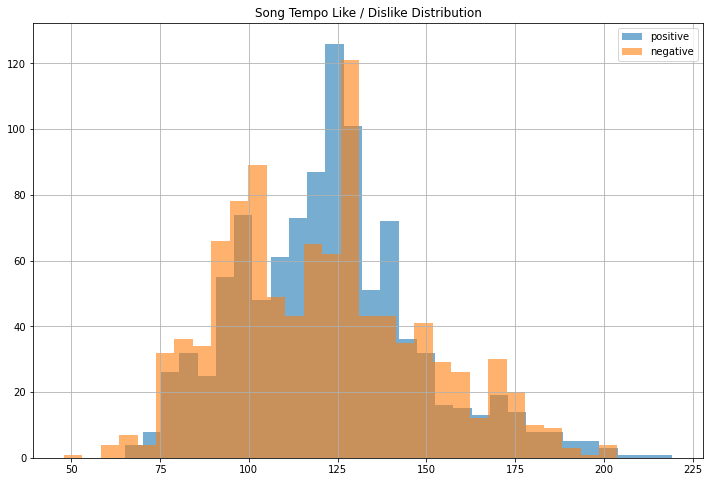

In [9]:
# Lets check out the distributions of the tempo column

# Specify the positive and negative tempo
pos_tempo = df[df['target'] == 1]['tempo']
neg_tempo = df[df['target'] == 0]['tempo']

plt.figure(figsize = (12, 8))
pos_tempo.hist(alpha = 0.6, bins = 30, label='positive')
neg_tempo.hist(alpha = 0.6, bins = 30, label='negative')
plt.title('Song Tempo Like / Dislike Distribution')
plt.legend(loc = "upper right")


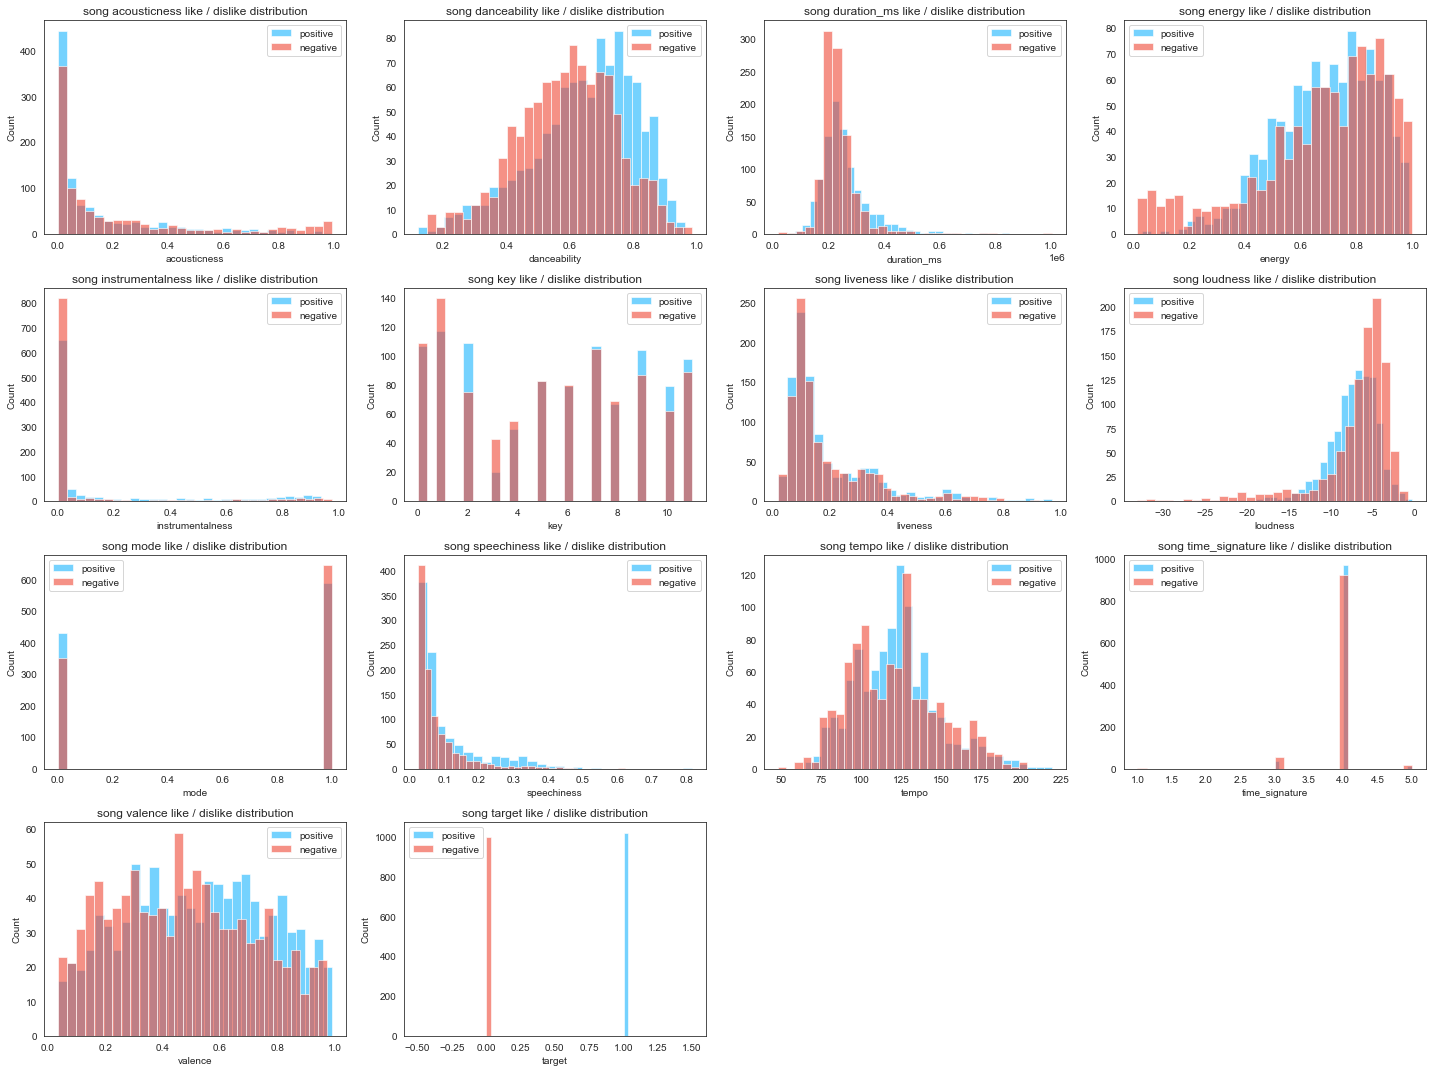

In [10]:
# Lets check out the columns' distribution.

# Custom Color Palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')

# Setting the plots layout
plt.subplots(3,4, figsize=(20,15))

# Plotting
for i, column in enumerate(df.columns, 1):
    plt.subplot(4,4,i)
    plt.hist(df[df['target']==1][column], alpha =0.6, bins=30, label= 'positive')
    plt.hist(df[df['target']==0][column], alpha =0.6, bins=30, label= 'negative')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'song {column} like / dislike distribution')
    plt.legend()
plt.tight_layout()

- For the `danceability` feature, we can see a slight bias toward disliking song with lower density index and a slight preferece for songs with higher danceability index.
- For the `key` feature, we have 12 different keys which can be called the standard pitch class notation. For example, 0 is the key of C seems to be the second highest observation; it seems like 3 which is D sharp has the lowest number of observations as well as the highest relative distribution of dislike.
- For the song `loudness` feature, there is a big spike for songs at the very extreme end of loudness.

### Step 2: Building Decision Tree Classifier

We will: 

- Assign our features and target variables to `X` and `y`, respectively, 

- Create our training ( `X_train` ) and test ( `X_test` ) sets using `train_test_split()`,

- Scale `X_train` and `X_test` using the `MinMaxScaler()`, and 

- Standardize `X_train` and `X_test` using the `StandardScaler()`. 

In [11]:
# Assign our features to X 
X = df.drop(['target'], axis=1)

# Assign our target to y 
y = df['target']

# Check independent variable and dependent variable
display(X)

display(y)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623


0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [12]:
# Create our training and test sets, 20% test size, random state of 5 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, stratify=y)

# Check shape 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1613, 13) (404, 13) (1613,) (404,)


Now that we have our `X_train` and `X_test` let's transform them with our two different scalers. 

Remember, we need to: 
1. Instantiate the scaler
2. Fit the scaler to the **training** data 
3. Transform both the training and test features

_While we didn't need to scale our data for our Decision Tree model performance, it's best practice to scale our data anyways._

**MinMaxScaler**

In [13]:
# Instantiate the scaler
MM = MinMaxScaler()

# Fit the scaler
MM.fit(X_train)

# Transform the training and test sets 
X_train_mm = MM.transform(X_train)
X_test_mm = MM.transform(X_test)

**StandardScaler**

In [14]:
# Instantiate the scaler
SS = StandardScaler()

# Fit the scaler
SS.fit(X_train)

# Transform the training and test sets 
X_train_ss = SS.transform(X_train)
X_test_ss = SS.transform(X_test)

The goal of the tree is to ultimately split observations into groups of homogenous target values (0 or 1), giving us a set of "paths" to follow to determine if this user liked or disliked a particular song.

Now we will fit sklearn's `DecisionTreeClassifier()` with different `max_depth`s for both sets of transformed data. 

The paramater `max_depth` is what the name suggests: The maximum depth that you allow the tree to grow to. In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting in decision trees because your model will fit perfectly for the training data and will not be able to generalize well on test set.

**MinMaxScaler:**

In [15]:
# Check the numbers of row in train set:
X_train.shape[1]

13

In [16]:
range(1, int(np.sqrt(X_train.shape[0])))

range(1, 40)

_The theoritical maximum depth a decision tree can achieve is one less than the number of training samples, but that will lead to severe overfitting, so I have decided to test out a range of 1 to 40._

In [17]:
# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc_mm = []
test_acc_mm = []

# Loop through the depths
for max_depth in depths:
    
    # Instantiate the model 
    DT = DecisionTreeClassifier(max_depth=max_depth)
    
    # Fit the model 
    DT.fit(X_train_mm, y_train)
    
    # Score the model 
    train_acc_mm.append(DT.score(X_train_mm, y_train))
    test_acc_mm.append(DT.score(X_test_mm, y_test))

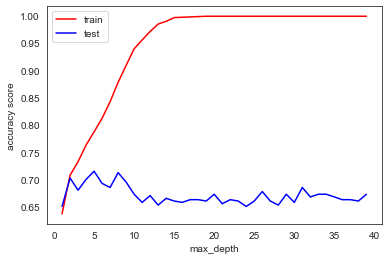

In [18]:
# Plot the accuracies
plt.figure()
plt.plot(depths, train_acc_mm, c='red', label='train')
plt.plot(depths, test_acc_mm, c='blue', label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

We will select `max_depth=5`. 

In [19]:
# The best DT

# Instantiate the model 
DT_mm = DecisionTreeClassifier(max_depth=5)

# Fit the model 
DT_mm.fit(X_train_mm, y_train)

# Score
print(DT_mm.score(X_train_mm, y_train))
print(DT_mm.score(X_test_mm, y_test))

0.78735275883447
0.7153465346534653


**StandardScaler:**

In [20]:
# Empty lists to append to 
train_acc_ss = []
test_acc_ss = []

# Loop through the different depths
for max_depth in depths: 
    
    # Instantiate the model 
    DT = DecisionTreeClassifier(max_depth=max_depth)
    
    # Fit the model 
    DT.fit(X_train_ss, y_train)
    
    # Score the model 
    train_acc_ss.append(DT.score(X_train_ss, y_train))
    test_acc_ss.append(DT.score(X_test_ss, y_test))

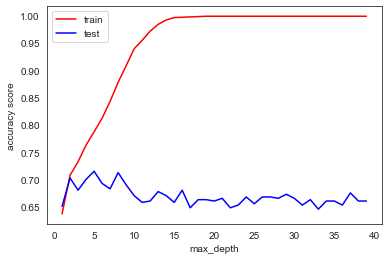

In [21]:
# Plot the accuracies
plt.figure()
plt.plot(depths, train_acc_ss, c='red', label='train')
plt.plot(depths, test_acc_ss, c='blue', label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.legend()
plt.show()

`max_depth=5` again. 

In [22]:
# The DT that performed best on the standardized data

# Instantiate the model 
DT_ss = DecisionTreeClassifier(max_depth=5)

# Fit the model 
DT_ss.fit(X_train_ss, y_train)

# Score
print(DT_ss.score(X_train_ss, y_train))
print(DT_ss.score(X_test_ss, y_test))

0.78735275883447
0.7153465346534653


Between the two sklearn scalers, `DecisionTreeClassifier()` performance on both for a given max_depth is almost identical. Even looking between the two figures we made, it's difficult to distinguish the differences. 

If we recall from our *Decision Trees* lecture, this is because every split or decision is made based on a single attribute at a time, so for Decision Trees it doesn't matter whether the different attributes are of different scales! 


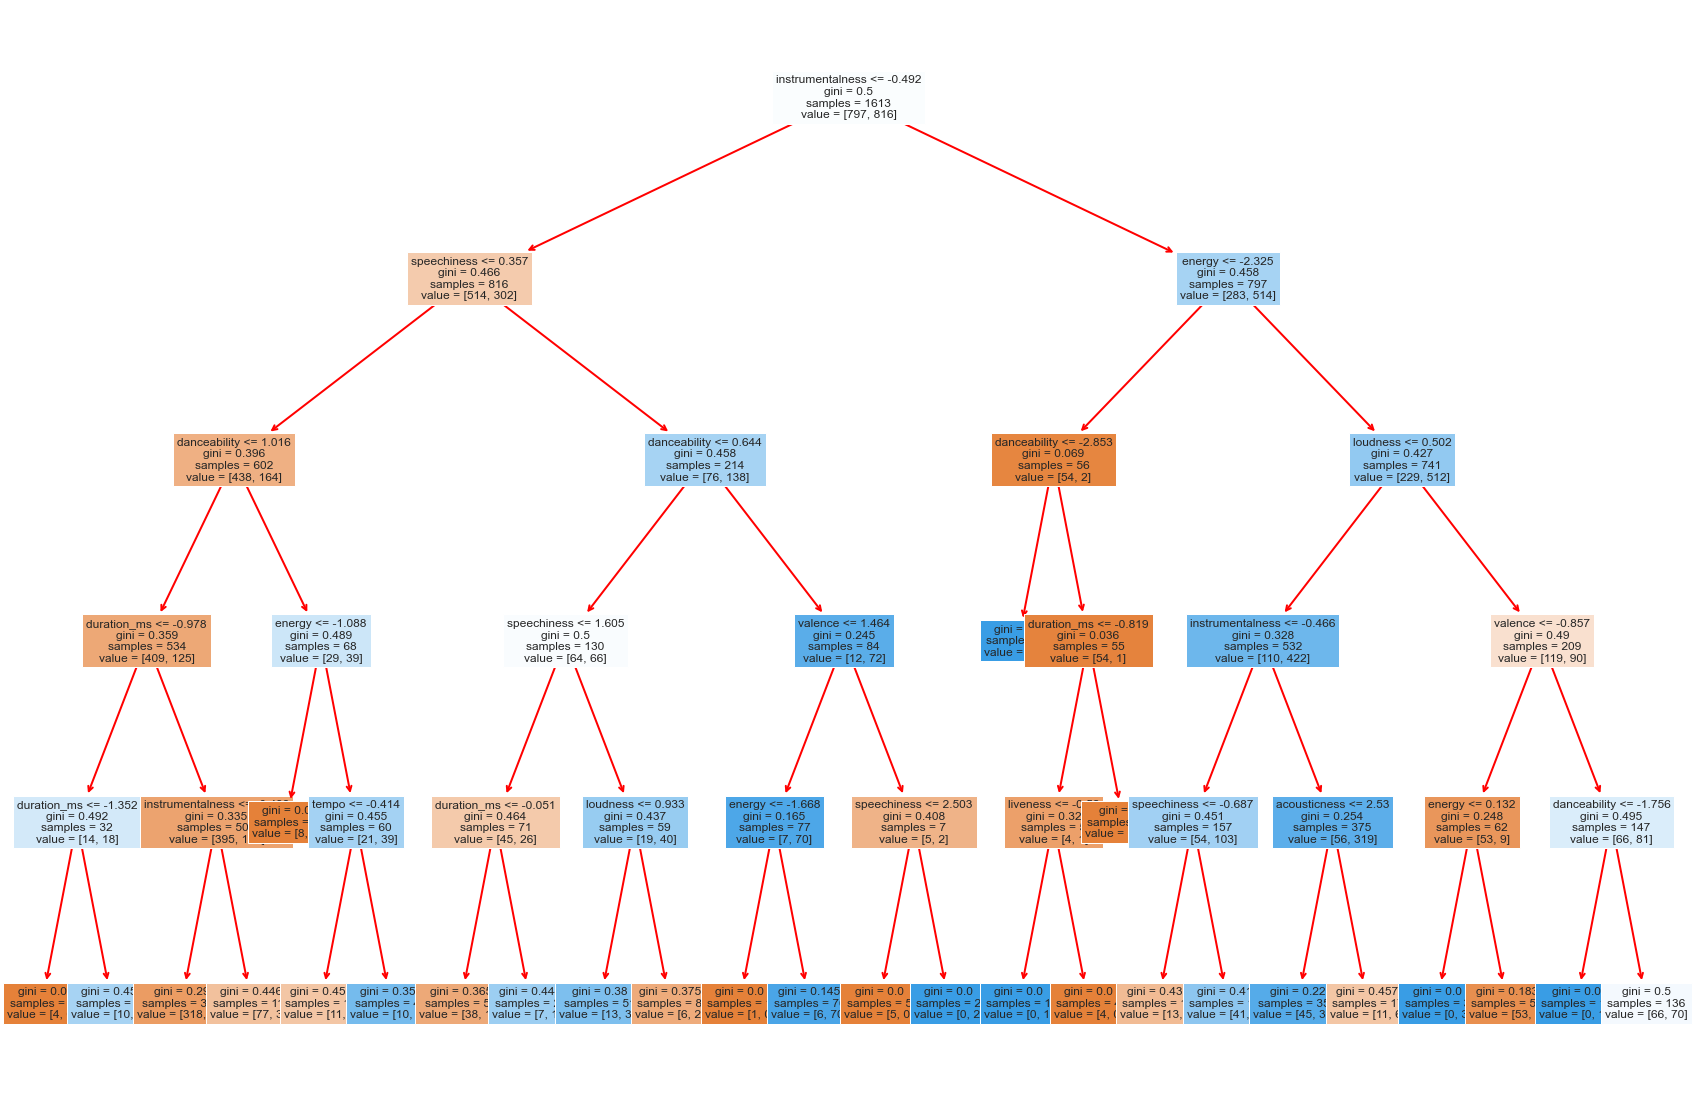

In [24]:
# Plot Tree

fig, ax = plt.subplots(figsize=(30,20))

out = plot_tree(DT_ss,
                feature_names=X.columns,
                filled=True,
                ax=ax,
                fontsize=12)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(2)

This tree is straightforward and one of the advantages of the decision trees is they are interpretable. We can look at the process that the model has used to classify whether or not am user liked or disliked a particular song.
We can look at any nodes in this tree here and see explitcitly the decision that is being made to classify a song into one or the other value.

The other advantage of decision trees is the fact that we have to do very little preparation of our data. In fact, our data have a different sort of types. For example, most of our features have continous values ("Loudness", "Duration", and "Speechiness"); whereas, the other feature as "Key" is discreet in which we have 12 possible values of "Key" to predict.

You can also try KNN Classifier with this dataset and compare between 2 models.

END.